C:\Users\ybola\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\ybola\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\ybola\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


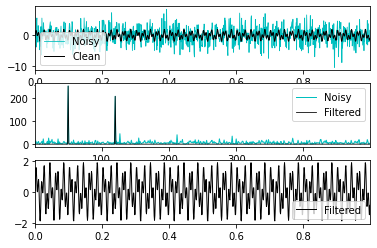

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.core.numeric import indices

dt = .001
t = np.arange(0,1,dt)
f_clean = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)
f = f_clean + 2.5 * np.random.randn(len(t))

n = len(t)
fhat = np.fft.fft(f,n)
PSD = fhat * np.conj(fhat)/n
freq = (1/(dt*n)) * np.arange(n)
L = np.arange(1,np.floor(n/2),dtype='int')

indices = PSD > 100
PSDclean = PSD*indices
fhat = indices*fhat
ffilt = np.fft.ifft(fhat)

fig,ax = plt.subplots(3,1)

plt.sca(ax[0])
plt.plot(t, f, color='c', linewidth=0.8, label='Noisy')
plt.plot(t, f_clean, color='k', linewidth=1, label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(ax[1])
plt.plot(freq[L],PSD[L],color='c',linewidth=1,label='Noisy')
plt.plot(freq[L],PSDclean[L],color='k',linewidth=.8,label='Filtered')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.sca(ax[2])
plt.plot(t,ffilt,color='k',linewidth=1,label='Filtered')
plt.xlim(t[0],t[-1])
plt.legend()

plt.show()